In [ ]:
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-06_4ghuz
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-06_4ghuz


In [ ]:
import os
import numpy as np
import torch
import clip
import cv2
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Class = ["Buffalo", "Elephant", "Rhino","Zebra"]
Class_dic = {1:"Buffalo", 2:"Elephant", 3:"Rhino", 4:"Zebra"}

In [ ]:
image_labels = []
image_file = []
path = "/content/drive/MyDrive/Transformer_CLIP/Data"


for i in Class:
    paths = path + '/' + i
    images = os.listdir(paths)

    for img in images:
        
        try:
            image_file.append(paths + '/' + img)
            image_labels.append(i)
        except:
            print("Error in " + img)

print(len(image_file))

4003


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)
predict = []
for i in image_file:
  image = preprocess(Image.open(i)).unsqueeze(0).to(device)
  text = clip.tokenize(["Buffalo", "Elephant", "Rhino","Zebra"]).to(device)

  with torch.no_grad():
      image_features = model.encode_image(image)
      text_features = model.encode_text(text)
      
      logits_per_image, logits_per_text = model(image, text)
      probs = logits_per_image.softmax(dim=-1).cpu().numpy()
  
  res = 0
  pos = -1
  for j in range(len(probs[0])):
    if probs[0][j] > res:
      res = probs[0][j]
      pos = j + 1
  predict.append(Class_dic[pos])
print(predict)

['Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Rhino', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 'Buffalo', 

In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(f"Accuracy is {sklearn.metrics.accuracy_score(predict, image_labels)}")

Accuracy is 0.9830127404446665


In [ ]:
confusion_mat = confusion_matrix(y_true = image_labels, y_pred = predict, labels=Class)

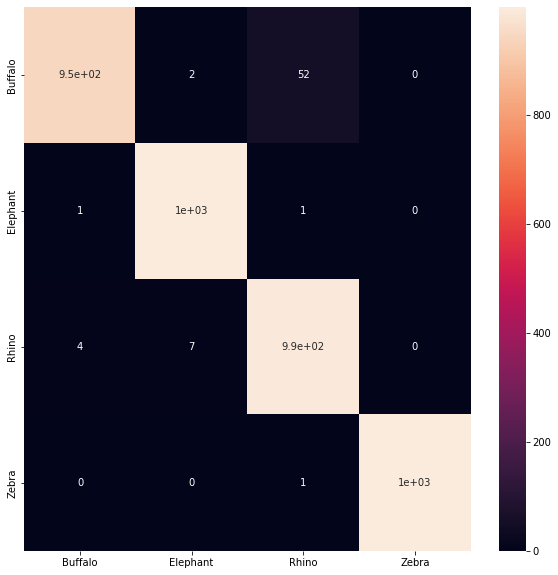

In [ ]:
df_cm = pd.DataFrame(confusion_mat, index = Class,columns = Class)
plt.rcParams['figure.figsize'] = (10,10)
sns.heatmap(df_cm, annot=True)